In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Load the dataset
df = pd.read_csv('vgsales.csv')

In [29]:
# Display the first few rows
df.head()

# Display basic information about the DataFrame
#print(df.info())

# Display summary statistics
#print(df.describe())


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [30]:
# Check for missing values
df.isnull().sum()

# Optionally, drop rows with missing values (or you can fill them)
df.dropna(inplace=True)  # Drops rows with any missing values
# OR fill missing values
# df.fillna(value={'ColumnName': 'value'}, inplace=True)


In [31]:
# Get the top 10 selling games
top_selling = df.nlargest(10, 'Global_Sales')
top_selling[['Name', 'Global_Sales']]


,Name,Global_Sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37
5,Tetris,30.26
6,New Super Mario Bros.,30.01
7,Wii Play,29.02
8,New Super Mario Bros. Wii,28.62
9,Duck Hunt,28.31


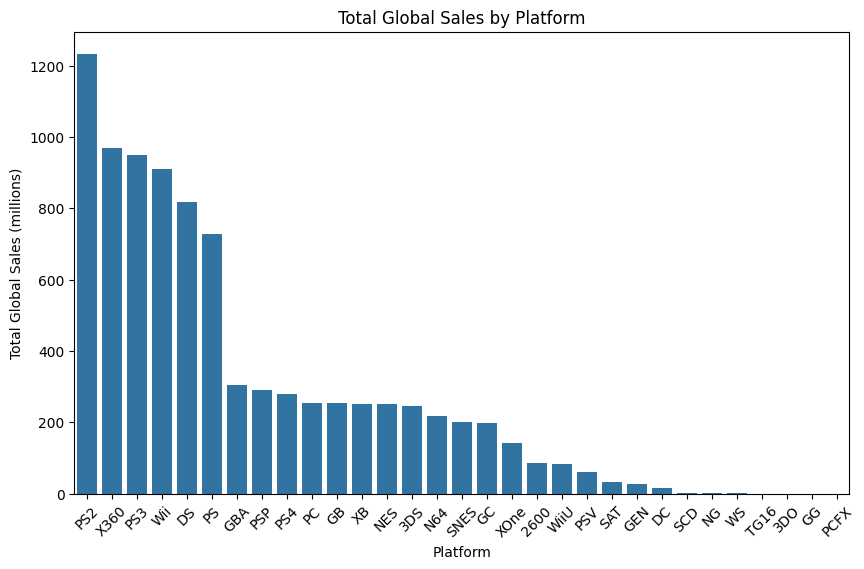

In [32]:
# Sales by platform
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
platform_sales

# Plotting the sales by platform
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.title('Total Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Global Sales (millions)')
plt.xticks(rotation=45)
plt.show()


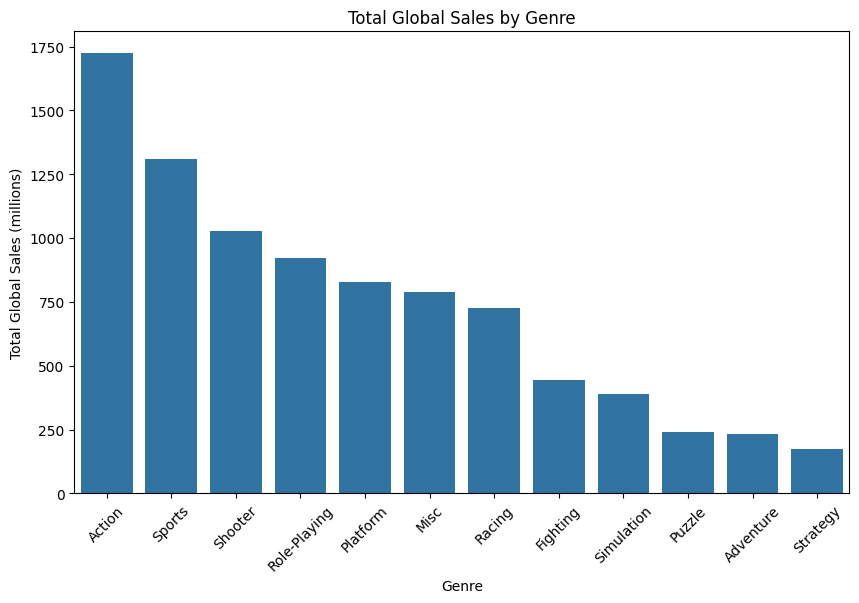

In [33]:
# Sales by genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
genre_sales

# Plotting the sales by genre
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Global Sales (millions)')
plt.xticks(rotation=45)
plt.show()


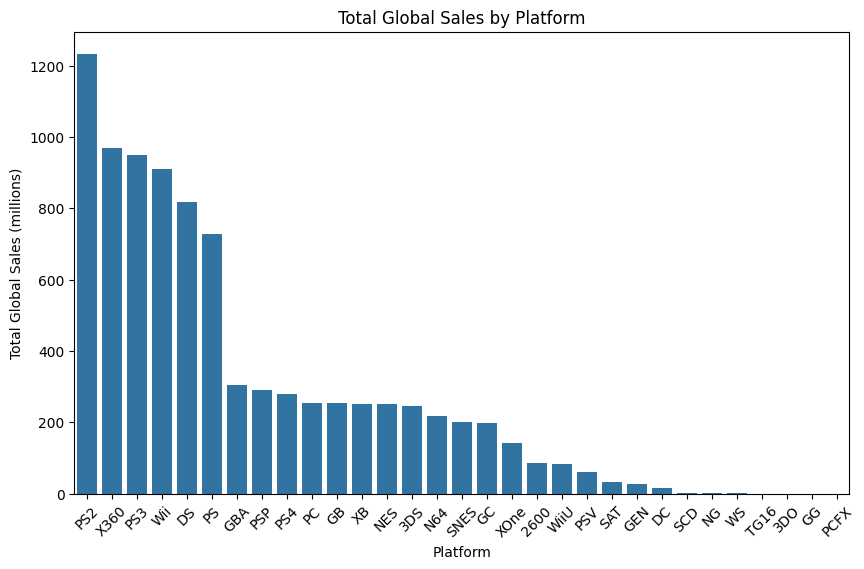

In [34]:
# Save the cleaned DataFrame
df.to_csv('cleaned_video_game_sales.csv', index=False)

# Save plots as images
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.title('Total Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Global Sales (millions)')
plt.xticks(rotation=45)
plt.savefig('platform_sales.png')
